In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from collections import Counter
data = pd.read_csv("data.csv")
X = data.drop('DECYZJA', axis=1)
y = data['DECYZJA']
target_count = y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
data = pd.read_csv("result.csv")

target_count = data.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])



Class 0: 12950
Class 1: 87050


KeyError: 0

Class 0: 12950
Class 1: 87050
Proportion: 0.15 : 1
Random under-sampling:
1    12950
0    12950
Name: DECYZJA, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

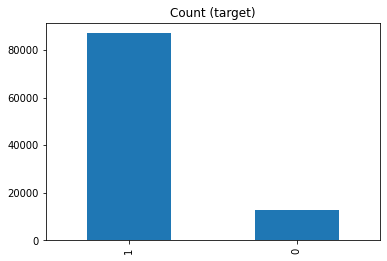

In [21]:
import numpy as np
import pandas as pd

df_train = pd.read_csv("data.csv")

target_count = df_train["DECYZJA"].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')
count_class_0, count_class_1 = df_train['DECYZJA'].value_counts()

# Divide by class
df_class_0 = df_train[df_train['DECYZJA'] == 1]
df_class_1 = df_train[df_train['DECYZJA'] == 0]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under["DECYZJA"].value_counts())

df_test_under["DECYZJA"].value_counts().plot(kind='bar', title='Count (target)')


In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2)


In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, clf_predict))
print('Accuracy score:',accuracy_score(y_test, clf_predict))
print('F1 score:',f1_score(y_test, clf_predict))
# Clear dataset
    # ROCAUC score: 0.5
    # Accuracy score: 0.86955
    # F1 score: 0.9302238506592496
# NearMiss
    # ROCAUC score: 0.7594794337526802
    # Accuracy score: 0.7588803088803089
    # F1 score: 0.7780344766305313


ROCAUC score: 0.7576738594096356
Accuracy score: 0.7586872586872587
F1 score: 0.7810091100210231


/home/jakub/Documents/GitHub/MachineLearning/.wzum/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=14, random_state=0)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, clf_predict))
print('Accuracy score:',accuracy_score(y_test, clf_predict))
print('F1 score:',f1_score(y_test, clf_predict))
# Clear dataset
    # ROCAUC score: 0.5044556337420841
    # Accuracy score: 0.86965
    # F1 score: 0.93018024049921
# NearMiss
    # ROCAUC score: 0.8362406901446686
    # Accuracy score: 0.8357142857142857
    # F1 score: 0.8471349021016706


import pickle
filename = 'model.sav'
pickle.dump(clf, open(filename, 'wb'))




ROCAUC score: 0.8299081182398442
Accuracy score: 0.8308880308880309
F1 score: 0.8462078651685394


In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, clf_predict))
print('Accuracy score:',accuracy_score(y_test, clf_predict))
print('F1 score:',f1_score(y_test, clf_predict))
# Clear dataset
    # ROCAUC score: 0.5
    # Accuracy score: 0.86955
    # F1 score: 0.9302238506592496


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, clf_predict))
print('Accuracy score:',accuracy_score(y_test, clf_predict))
print('F1 score:',f1_score(y_test, clf_predict))
# Clear dataset
    # ROCAUC score: 0.5055263117353691
    # Accuracy score: 0.84205
    # F1 score: 0.9136389731813336
# NearMiss
    # ROCAUC score: 0.7254249560698713
    # Accuracy score: 0.7237451737451738
    # F1 score: 0.7792007406264465


In [ ]:
from sklearn.neural_network import MLPClassifier
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(X_train, y_train)
clf_predict =clf.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, clf_predict))
print('Accuracy score:',accuracy_score(y_test, clf_predict))
print('F1 score:',f1_score(y_test, clf_predict))
# Clear dataset
    # ROCAUC score: 0.5001053927987626
    # Accuracy score: 0.86945
    # F1 score: 0.9301628908444111
# NearMiss
    # ROCAUC score: 0.710313990659546
    # Accuracy score: 0.7084942084942085
    # F1 score: 0.7709344660194174



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, clf_predict))
print('Accuracy score:',accuracy_score(y_test, clf_predict))
print('F1 score:',f1_score(y_test, clf_predict))
# Clear dataset
    # ROCAUC score: 0.5474520387280407
    # Accuracy score: 0.78635
    # F1 score: 0.8763492201290622
# NearMiss
    # ROCAUC score: 0.7636659709106294
    # Accuracy score: 0.7637065637065638
    # F1 score: 0.7610308473252635

import pickle
filename = 'model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [24]:
from sklearn.svm import SVC
svc_model = SVC(class_weight='balanced', probability=True)
svc_model.fit(X_train, y_train)
svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))
# Clear dataset

# NearMiss
    # ROCAUC score: 0.7571931439332443
    # Accuracy score: 0.7565637065637065
    # F1 score: 0.7768536542204918

import pickle
filename = 'model.sav'
pickle.dump(clf, open(filename, 'wb'))

ROCAUC score: 0.7567022337996302
Accuracy score: 0.7577220077220077
F1 score: 0.7802486429697075


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

num_pipe = SimpleImputer(strategy="mean", add_indicator=True)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
)

preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(random_state=42, n_jobs=2)
)